In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading Data

In [ ]:
train=pd.read_csv("titanic_train.csv")
test=pd.read_csv("titanic_test.csv")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA

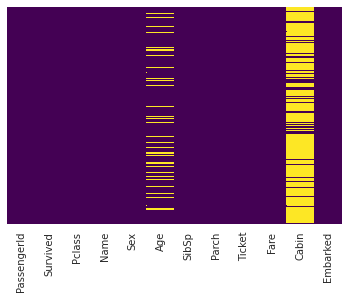

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
sns.set_style('whitegrid')

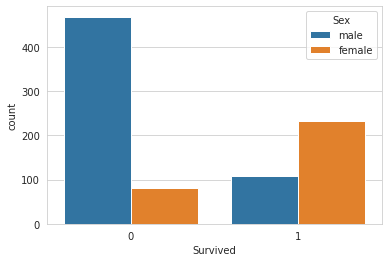

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=train)

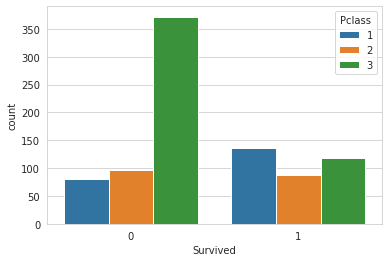

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=train)

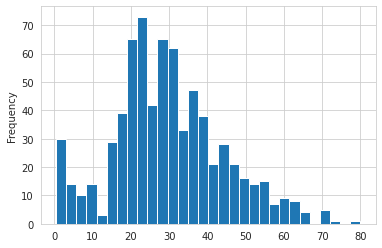

In [ ]:
train['Age'].plot.hist(bins=30)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


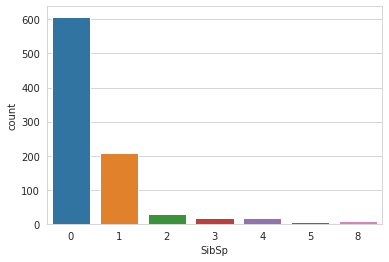

In [ ]:
sns.countplot(x='SibSp',data=train)

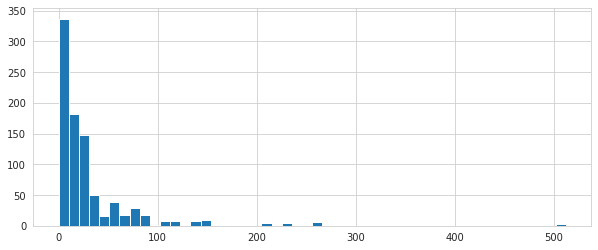

In [ ]:
train['Fare'].hist(bins=50,figsize=(10,4))

# Cleaning the train data

Step1: Dealing with missing data

age of passengers is missing so filling the data with mean of ages in that particular class(imputation)

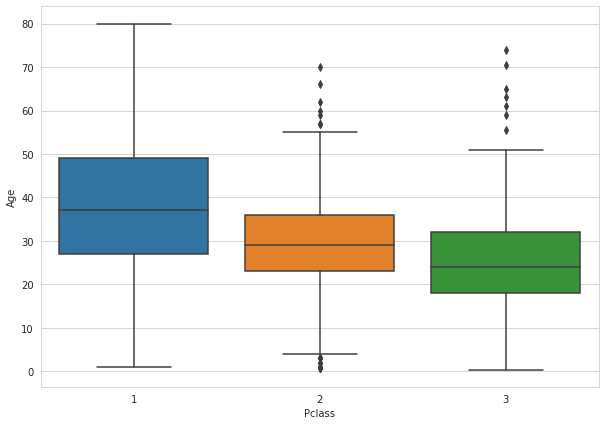

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [ ]:
Pclass_1_age=int(train[train['Pclass']==1]['Age'].mean())
Pclass_2_age=int(train[train['Pclass']==2]['Age'].mean())
Pclass_3_age=int(train[train['Pclass']==3]['Age'].mean())
print(Pclass_1_age,Pclass_2_age,Pclass_3_age)

38 29 25


In [ ]:
def impute_Age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return Pclass_1_age
    elif Pclass==2:
      return Pclass_2_age
    else:
      return Pclass_2_age
  else:
    return Age

In [ ]:
train['Age']=train[['Age','Pclass']].apply(impute_Age,axis=1)

In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

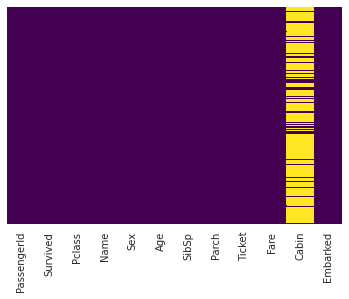

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Drop cabin column 

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.dropna(how='any',inplace=True)

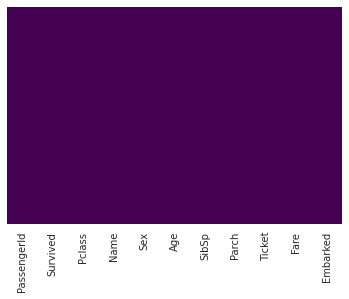

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

step2:Dealing with categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()
train.Sex = encoder.fit_transform(train.Sex)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [ ]:
train.Embarked = encoder.fit_transform(train.Embarked)

In [ ]:
train.drop(['Name','Ticket'],axis=1,inplace=True)

In [ ]:
train.tail()   #passenger id is just id starts at 1 no need of that column

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,1,27.0,0,0,13.00,2
887,888,1,1,0,19.0,0,0,30.00,2
888,889,0,3,0,29.0,1,2,23.45,2
889,890,1,1,1,26.0,0,0,30.00,0
890,891,0,3,1,32.0,0,0,7.75,1


In [ ]:
train.drop('PassengerId',axis=1,inplace=True)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Cleaning test data

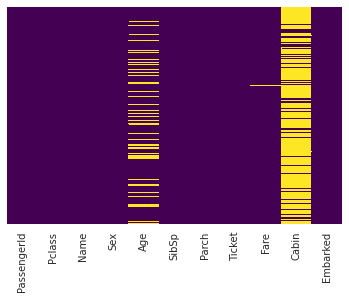

In [ ]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

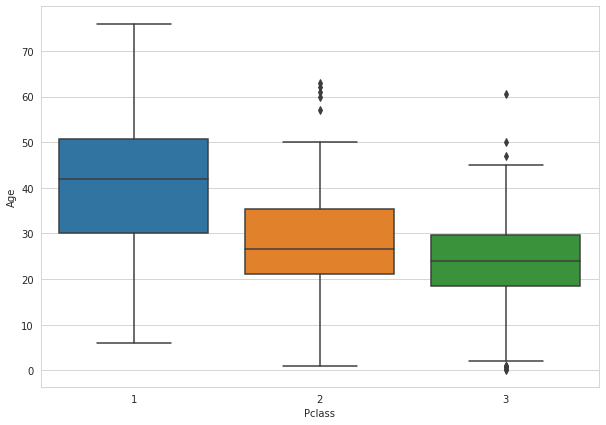

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=test)

In [ ]:
Pclass_1_age=int(test[test['Pclass']==1]['Age'].mean())
Pclass_2_age=int(test[test['Pclass']==2]['Age'].mean())
Pclass_3_age=int(test[test['Pclass']==3]['Age'].mean())
print(Pclass_1_age,Pclass_2_age,Pclass_3_age)

40 28 24


In [ ]:
def impute_Age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return Pclass_1_age
    elif Pclass==2:
      return Pclass_2_age
    else:
      return Pclass_2_age
  else:
    return Age

In [ ]:
test['Age']=test[['Age','Pclass']].apply(impute_Age,axis=1)

In [ ]:
test.drop('Cabin',axis=1,inplace=True)

In [ ]:
test.dropna(how='any',inplace=True)

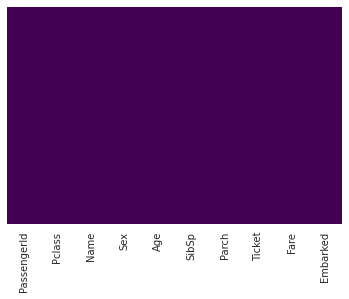

In [ ]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
test.Sex = encoder.fit_transform(test.Sex)

In [ ]:
test.Embarked= encoder.fit_transform(test.Embarked)

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


In [ ]:
test.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [ ]:
len(test)

417

# Logistic Regression

**Traning the model**

In [ ]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lm=LogisticRegression()
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions=lm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 33,  71]])

In [ ]:
from sklearn.metrics import plot_confusion_matrix

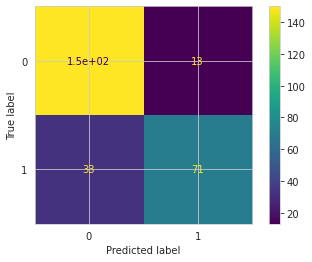

In [ ]:
plot_confusion_matrix(lm,X_test,y_test)

In [ ]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

Test data

In [ ]:
testing=pd.read_csv('gender_submission.csv')
testing.drop(152,axis=0,inplace=True)
testing=np.array(testing['Survived'])

In [ ]:
logmod=LogisticRegression()
logmod.fit(X,y)
predictions=logmod.predict(test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
print(classification_report(testing,predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       265
           1       0.92      0.93      0.92       152

    accuracy                           0.94       417
   macro avg       0.94      0.94      0.94       417
weighted avg       0.94      0.94      0.94       417



# KNN

In [ ]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,29.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features=scaler.transform(X)

In [ ]:
X_scale=pd.DataFrame(scaled_features,columns=X.columns)

In [ ]:
X_scale

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.825209,0.735342,-0.598936,0.431350,-0.474326,-0.500240,0.586840
1,-1.572211,-1.359911,0.626827,0.431350,-0.474326,0.788947,-1.939555
2,0.825209,-1.359911,-0.292495,-0.475199,-0.474326,-0.486650,0.586840
3,-1.572211,-1.359911,0.396997,0.431350,-0.474326,0.422861,0.586840
4,0.825209,0.735342,0.396997,-0.475199,-0.474326,-0.484133,0.586840
...,...,...,...,...,...,...,...
884,-0.373501,0.735342,-0.215885,-0.475199,-0.474326,-0.384475,0.586840
885,-1.572211,-1.359911,-0.828766,-0.475199,-0.474326,-0.042213,0.586840
886,0.825209,-1.359911,-0.062664,0.431350,2.006119,-0.174084,0.586840
887,-1.572211,0.735342,-0.292495,-0.475199,-0.474326,-0.042213,-1.939555


In [ ]:
scaler.fit(test)
scaled_features=scaler.transform(test)
test_scale=pd.DataFrame(scaled_features,columns=test.columns)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_scale,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
predictions=knn.predict(test_scale)

In [ ]:
print(classification_report(testing,predictions))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       265
           1       0.77      0.82      0.79       152

    accuracy                           0.84       417
   macro avg       0.83      0.84      0.83       417
weighted avg       0.84      0.84      0.84       417



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn import tree

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [ ]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- feature_4 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  1.50
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  2.50
|   |   |   |--- feature_5 <= 28.86
|   |   |   |   |--- feature_5 <= 28.23
|   |   |   |   |   |--- feature_2 <= 56.00
|   |   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |   |--- feature_5 <= 13.25
|   |   |   |   |   |   |   |   |--- feature_5 <= 12.82
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_5 >  12.82
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 26.00
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 21.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  21.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_2 >  26.00
|   |   |   |

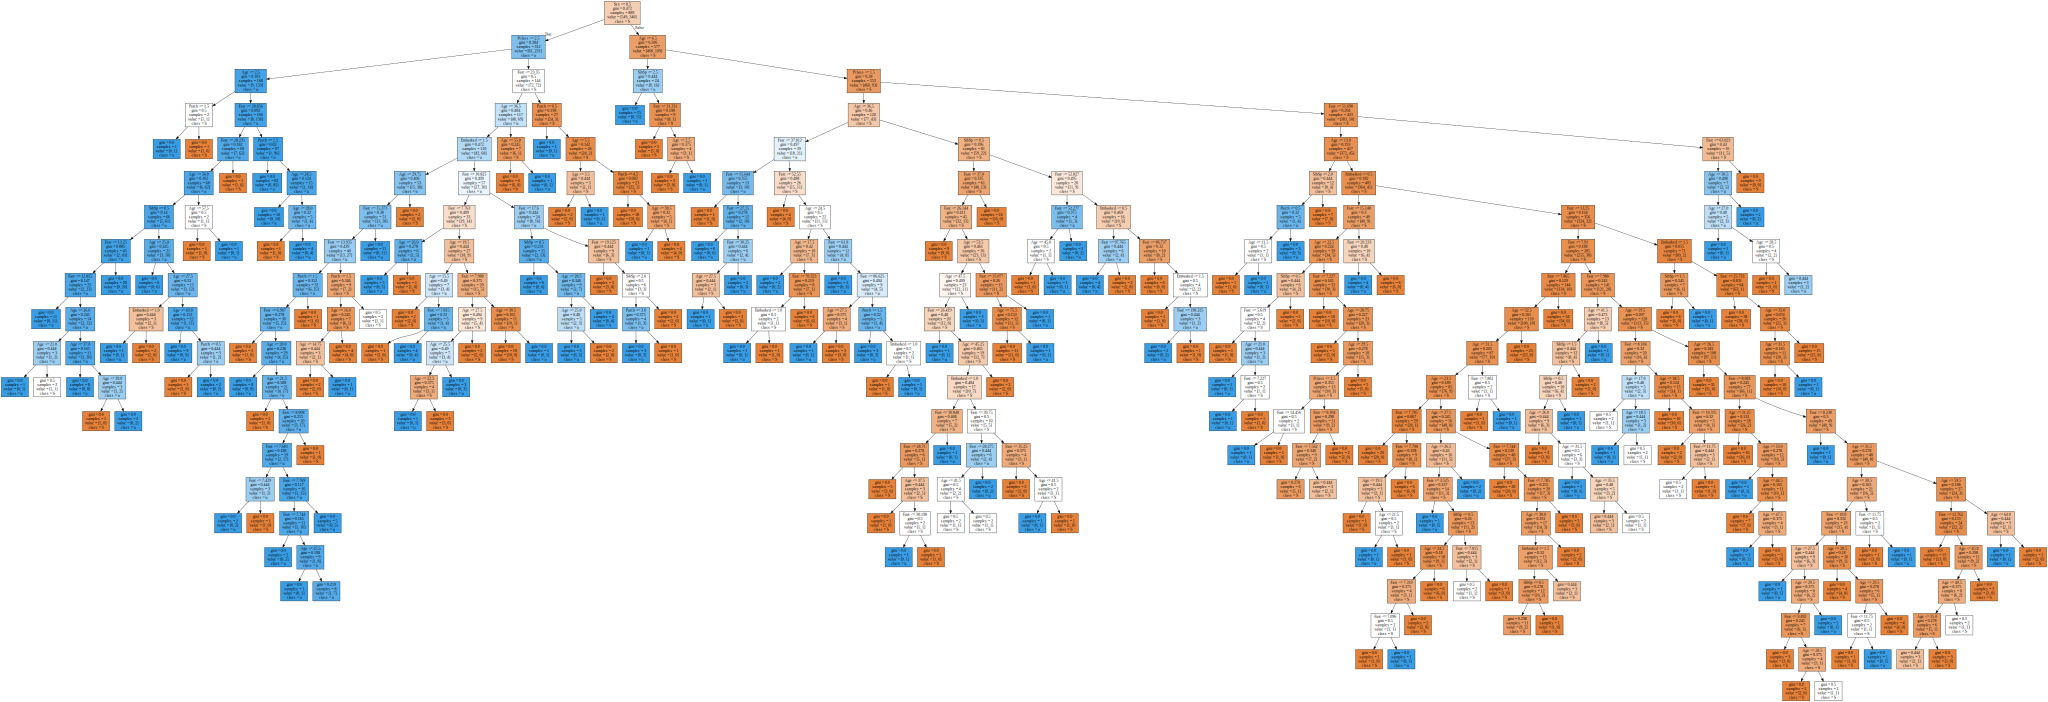

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=X.columns,  
                                class_names=y.name,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

In [ ]:
predictions = dtree.predict(test)

In [ ]:
print(classification_report(testing,predictions))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       265
           1       0.70      0.78      0.74       152

    accuracy                           0.80       417
   macro avg       0.79      0.80      0.79       417
weighted avg       0.81      0.80      0.80       417



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred = rfc.predict(test)

In [ ]:
print(classification_report(testing,rfc_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       265
           1       0.77      0.75      0.76       152

    accuracy                           0.82       417
   macro avg       0.81      0.81      0.81       417
weighted avg       0.82      0.82      0.82       417



# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
model.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions = model.predict(test)

In [ ]:
print(classification_report(testing,predictions))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       265
           1       0.55      0.28      0.37       152

    accuracy                           0.65       417
   macro avg       0.62      0.57      0.57       417
weighted avg       0.63      0.65      0.62       417



# Report on all models



  Model       ---       Accuracy  
*   Logistic Regression ---   0.94


*   KNN    ---   0.84

*   Decision tree    ---   0.80
*   Random Forest ---  0.82


*   SVM ---   0.65





